In [93]:
import numpy as np
import os
import glob
import matlab.engine
import matplotlib.pyplot as plt

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/connectivity_matrices/',p[i]+'/tracto_op_2_Lest/connectivity_matrices/']
    d[i] = a

all_mod = {}
all_gb = {}
all_cpl = {}
data1mod = []
data2mod = []
data1ge = []
data2ge = []
data1cpl = []
data2cpl = []
for i in d:
    for f in os.listdir(d[i][0]):
        if f.endswith('__tot_commit2_weights.npy'):
            tot = d[i][0] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                gb = eng.compute_gb(tot)
        if f.endswith('__len.npy'):
            clen = d[i][0] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)
    
    for l in os.listdir(d[i][1]):
        if l.endswith('__tot_commit2_weights.npy'):
            tot1 = d[i][1]  + l
            if os.path.exists(tot1):
                mod1 = eng.compute_mod(tot1)
                gb1 = eng.compute_gb(tot1)
        if l.endswith('__len.npy'):
            clen1 = d[i][1] + l
            if os.path.exists(clen1):
                cpl1 = eng.compute_cpl(clen1)
                
    data1mod.append(mod)
    data2mod.append(mod1)
    data1ge.append(gb)
    data2ge.append(gb1)
    data1cpl.append(cpl)
    data2cpl.append(cpl1)
    all_mod[i] = [mod, mod1]
    all_gb[i] = [gb, gb1]
    all_cpl[i] = [cpl, cpl1]
    mod = np.nan
    mod1 = np.nan
    gb = np.nan
    gb1 = np.nan
    cpl = np.nan
    cpl1 = np.nan
eng.quit()

In [70]:
Ldata2mod

[0.4744803885802735,
 0.6773007294274223,
 0.48512337957748897,
 0.5009110878721883,
 0.5009110878721883,
 0.4482814766183413,
 0.4514782865934463,
 0.4769281877192526,
 0.5477132028382312,
 0.4849284021772937,
 0.45343965041206175,
 0.48726556280046507,
 0.470177819253094,
 0.4877875645392591,
 0.6726438839098497,
 0.6020517780183724,
 0.6772618000440592,
 0.4953872315184476,
 0.5994838285794424,
 0.5269018646060998,
 0.48463444976384196,
 0.5516900457350274,
 0.48828381943143645,
 0.7223462865972764,
 0.4942911636916921,
 0.502161596560674,
 0.5248886705291078,
 0.5678510057815898,
 0.6689782654494831,
 0.4520595872463322,
 0.5903124573846311,
 0.44674620245087326,
 0.44674620245087326,
 0.517213620345891,
 0.4934122107028319,
 0.4918856337462259,
 0.6877532782907729,
 0.47773190824232803,
 0.4849444963428213,
 0.48527901792719724,
 0.4519925934261197,
 0.5657788970924664,
 0.5781163646676175,
 0.4707411325578161,
 0.49096921997126425,
 0.47104381957828323,
 0.5028101599020343,
 0.52

In [3]:
def cov_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    std       = np.std([data1, data2], axis=0)                  # Difference between data1 and data2
    cov        = (std / mean)  * 100                # Mean of the difference
    return cov

In [47]:
Lcov_mod = cov_cal(data1mod,data2mod)
Lcov_ge = cov_cal(data1ge,data2ge)
Lcov_cpl = cov_cal(data1cpl,data2cpl)

In [91]:
def diff_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    diff      = data1 - data2
    return diff

In [94]:
Ldiff_mod = diff_cal(data1mod,data2mod)
Ldiff_ge = diff_cal(data1ge,data2ge)
Ldiff_cpl = diff_cal(data1cpl,data2cpl)

In [101]:
Ldiff_mod

array([-2.06861933e-02, -2.10018775e-01,  1.98471966e-01, -2.77479711e-03,
                   nan,  2.66677193e-01,  6.73930569e-03,  1.28147604e-02,
       -7.33176576e-02,  2.19067071e-03,  7.22671042e-03,  2.19576312e-01,
        1.05356041e-02,  1.04962159e-01,  8.03497801e-04, -9.59614656e-02,
       -1.26594603e-02,  2.13330025e-01, -1.18202078e-01,  3.90509050e-02,
        2.79769033e-02, -2.51775231e-03,  3.45660173e-03, -2.45165420e-01,
        1.14149338e-01,  2.12190116e-01,  2.28329742e-03,  1.22955878e-01,
       -1.73383193e-01,  2.31332167e-01,  1.00984281e-01,  1.76238398e-02,
                   nan,  2.96171007e-05,  1.50957823e-02,  1.98680404e-01,
       -6.15667227e-03,  4.97044685e-03,  3.52795118e-03,  1.91587385e-01,
        2.44226669e-01, -5.82428604e-02, -1.15281932e-02,  7.13550897e-03,
        2.06532056e-01,  3.35808241e-03, -5.77162278e-04,  2.33598601e-03,
                   nan,             nan,  1.26441722e-02,  5.24970371e-04,
        6.31545099e-04,  

In [3]:
pe1_mod = []
for i in all_mod:
    pe1_mod.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )
    
pe1_ge = []
for i in all_gb:
    pe1_ge.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    
pe1_cpl = []
for i in all_cpl:
    pe1_cpl.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )
pe2_mod = []
for i in all_mod:
    pe2_mod.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )
    
pe2_ge = []
for i in all_gb:
    pe1_ge.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    
pe2_cpl = []
for i in all_cpl:
    pe1_cpl.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )    

In [44]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/length_stats.json',p[i]+'/tracto_op_2_Lest/stats_json/length_stats.json']
    d[i] = a

Lallcov_len = []
for i in d:

    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0] 
    k1 = list(data1.keys())[0]
    if k == k1: 
        
        v = list(data[k].values()) # get the value of the subj dict
        v1 = list(data1[k1].values())

    
        if len(v) == len(v1): # if the number of bundles generated is same
            cov_list = []
            for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
                vlen = (v[j]['mean_length'])
                vlen1 = (v1[j]['mean_length'])
                mean = np.mean([vlen, vlen1], axis=0)
                std = np.std([vlen, vlen1], axis=0)
                cov = (std / mean) * 100
                cov_list.append(cov)
            mean_cov = np.mean(cov_list)
        else:
            mean_cov = np.nan
            

    Lallcov_len.append(mean_cov)
#     all_len[i] = [mean, mean1]

In [65]:
Lallcov_len

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.4189996120573958,
 nan,
 nan,
 1.3542721434977472,
 4.366752821397827,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.304253300162885,
 nan,
 nan,
 nan,
 4.415616152539069,
 nan,
 nan,
 nan,
 nan,
 2.495486380640262,
 1.8315547808797215,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9161971319430546,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.775018105629513,
 2.785405668183589,
 nan,
 nan,
 1.6908447463926823,
 nan,
 2.017059152017445,
 nan,
 nan,
 nan,
 nan,
 7.619179903263775,
 4.919679177504921,
 nan,
 1.1575331260381196,
 1.1575331260381196,
 1.9789726565867816,
 nan,
 nan,
 nan,
 3.893212018905538,
 3.893212018905538,
 nan,
 8.947254304268315,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0347004705512877,
 2.0347004705512877,
 2.0347004705512877,
 4.293015939663795,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.2318216530222053,
 nan,
 nan,
 n

In [43]:
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/volumes.json',p[i]+'/tracto_op_2_Lest/stats_json/volumes.json']
    d[i] = a

Lallcov_vol = []

for i in d:
    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0]
    k1 = list(data1.keys())[0]
    if k == k1:
        v = list(data[k].values())
        v1 = list(data1[k1].values())
        
        if len(v) == len(v1): # if the number of bundles generated is same
            cov_list = []
            for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
                vol = (v[j]['volume'])
                vol1 = (v1[j]['volume'])
                mean = np.mean([vol, vol1], axis=0)
                std = np.std([vol, vol1], axis=0)
                cov = (std / mean) * 100
                cov_list.append(cov)
            mean_cov = np.mean(cov_list)
        else:
            mean_cov = np.nan
            

    Lallcov_vol.append(mean_cov)

In [105]:
import pandas as pd
df1 = pd.DataFrame(diff_mod).assign(x='Without L(r)').dropna()
df2 = pd.DataFrame(Ldiff_mod).assign(x='With L(r)').dropna()

df3 = pd.DataFrame(diff_ge).assign(x='Without L(r)').dropna()
df4 = pd.DataFrame(Ldiff_ge).assign(x='With L(r)').dropna()

df5 = pd.DataFrame(diff_cpl).assign(x='Without L(r)').dropna()
df6 = pd.DataFrame(Ldiff_cpl).assign(x='With L(r)').dropna()

dfmod = pd.concat([df1,df2])
dfge = pd.concat([df3,df4])
dfcpl = pd.concat([df5,df6])

In [104]:
df1

,0,x
0,-0.019541,Without L(r)
1,0.000668,Without L(r)
2,-0.009220,Without L(r)
3,-0.007380,Without L(r)
4,-0.014504,Without L(r)
...,...,...
112,0.012760,Without L(r)
114,-0.011821,Without L(r)
115,0.001651,Without L(r)
116,-0.001025,Without L(r)


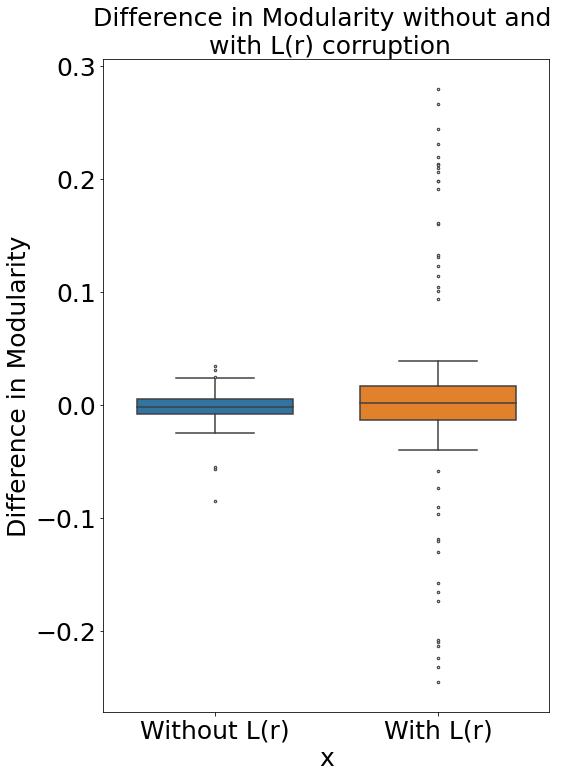

In [106]:
import seaborn as sns
plt.figure(figsize=(8,12))
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
sns.boxplot(x="x",y=0,data=dfmod,flierprops=flierprops, width=0.7 )
plt.title('Difference in Modularity without and \n with L(r) corruption', fontsize=25)
plt.ylabel('Difference in Modularity',fontsize = 25)
plt.rcParams.update({'font.size':25})

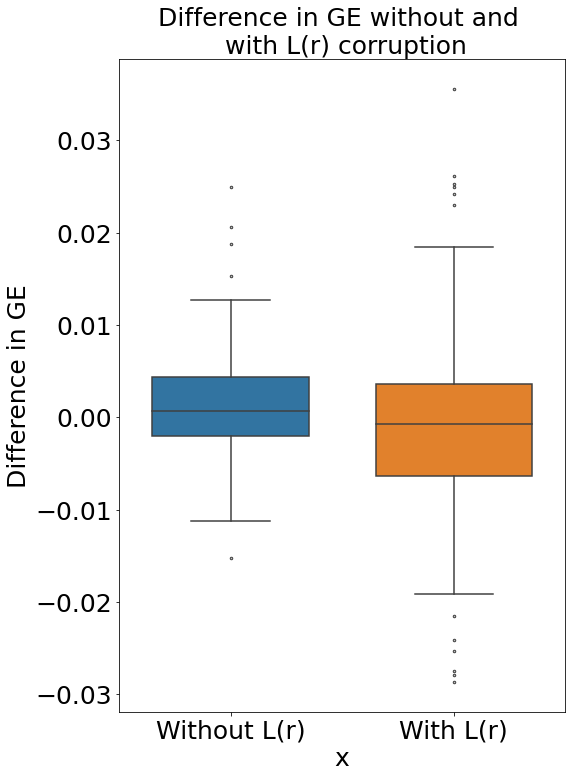

In [107]:
plt.figure(figsize=(8,12))
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
sns.boxplot(x="x",y=0,data=dfge,flierprops=flierprops, width=0.7 )
plt.title('Difference in GE without and \n with L(r) corruption', fontsize=25)
plt.ylabel('Difference in GE',fontsize = 25)
plt.rcParams.update({'font.size':25})

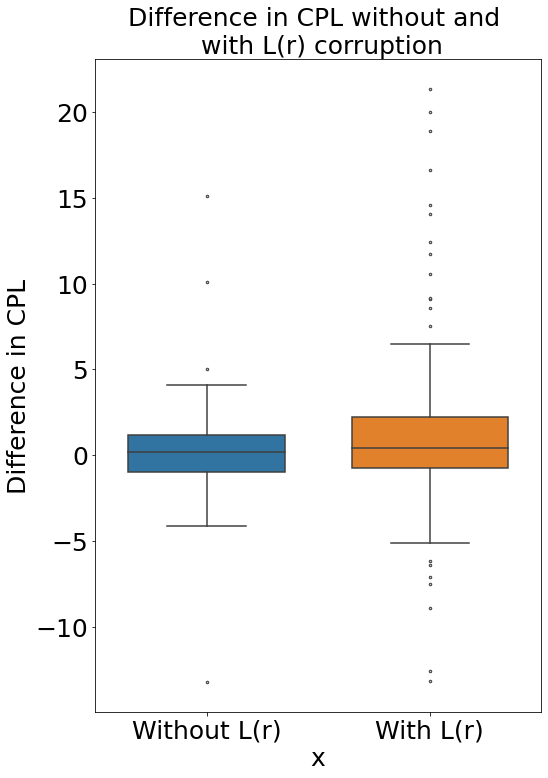

In [108]:
plt.figure(figsize=(8,12))
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
sns.boxplot(x="x",y=0,data=dfcpl,flierprops=flierprops, width=0.7 )
plt.title('Difference in CPL without and \n with L(r) corruption', fontsize=25)
plt.ylabel('Difference in CPL',fontsize = 25)
plt.rcParams.update({'font.size':25})

In [50]:
from scipy import stats
df1 = pd.DataFrame(cov_mod)
df2 = pd.DataFrame(Lcov_mod)
df3 = pd.DataFrame(cov_ge)
df4 = pd.DataFrame(Lcov_ge)
df5 = pd.DataFrame(cov_cpl)
df6 = pd.DataFrame(Lcov_cpl)
df7 = pd.DataFrame(allcov_len)
df8 = pd.DataFrame(Lallcov_len)
df9 = pd.DataFrame(allcov_vol)
df10 = pd.DataFrame(Lallcov_vol)
                                 
pmod = stats.wilcoxon(df1[0], df2[0])
pge = stats.wilcoxon(df3[0], df4[0])
pcpl = stats.wilcoxon(df5[0], df6[0])
plen = stats.wilcoxon(df7[0], df8[0])
pvol = stats.wilcoxon(df9[0], df10[0])

In [58]:
print(pmod,pge,pcpl,plen,pvol)
praw = [pmod.pvalue,pge.pvalue,pcpl.pvalue,plen.pvalue,pvol.pvalue]

WilcoxonResult(statistic=1317.0, pvalue=3.849517054893291e-09) WilcoxonResult(statistic=1727.0, pvalue=1.6719832101806451e-06) WilcoxonResult(statistic=1838.0, pvalue=7.075186401025977e-06) WilcoxonResult(statistic=21.0, pvalue=7.193336843705835e-21) WilcoxonResult(statistic=16.0, pvalue=6.333411081848891e-21)


In [59]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(praw, alpha=0.005,method='bonferroni')
p_adjusted

(array([ True,  True,  True,  True,  True]),
 array([1.92475853e-08, 8.35991605e-06, 3.53759320e-05, 3.59666842e-20,
        3.16670554e-20]),
 0.0010020060210801374,
 0.001)

In [63]:
def cohend(c0,c1):
    cohens_d = (np.nanmean(c0) - np.nanmean(c1)) / (np.sqrt((np.nanstd(c0) ** 2 + np.nanstd(c1) ** 2) / 2))
    return cohens_d

In [109]:
dmod = cohend(df1[0], df2[0])
dge = cohend(df3[0], df4[0])
dcpl = cohend(df5[0], df6[0])
print(dmod,dge,dcpl)

-0.19110096947267435 0.33398975730634417 -0.25822452242393507
